<a href="https://colab.research.google.com/github/mitunkantipaul/MachinLearning_mitun/blob/main/BrestCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files
files.upload()                                    # uploading csv files
xtrain = pd.read_csv('xtrain.csv', header=None)
ytrain = pd.read_csv('ytrain.csv', header=None)
xtest = pd.read_csv('xtest.csv', header=None)
ytest = pd.read_csv('ytest.csv', header=None)

Saving xtest.csv to xtest.csv
Saving xtrain.csv to xtrain.csv
Saving ytest.csv to ytest.csv
Saving ytrain.csv to ytrain.csv


In [ ]:
# Now we build ANN model with Keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()   # initializing the ANN

classifier.add(Dense(units=16, activation='relu', input_dim=30))
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Now we have to spacify optimizer and loss function
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [ ]:
# Now we are going to train the Network
classifier.fit(xtrain, ytrain, batch_size=1, epochs=100)


Epoch 1/100
455/455 [==============================] - 1s 2ms/step - loss: 0.3818
Epoch 2/100
455/455 [==============================] - 1s 1ms/step - loss: 0.1365
Epoch 3/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0934
Epoch 4/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0855
Epoch 5/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0823
Epoch 6/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0902
Epoch 7/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0788
Epoch 8/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0867
Epoch 9/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0804
Epoch 10/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0756
Epoch 11/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0705
Epoch 12/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0785
Epoch 13/100

In [ ]:
ypred = classifier.predict(xtest)

ypred = pd.Series([1 if y>=0.5 else 0 for y in ypred])
print(type(ypred))

<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix(ypred, ytest)

In [ ]:
conf_mat = pd.DataFrame(conf_mat, index=['non_cancererous', 'cancererous'], columns=['non_cancererous', 'cancererous'])


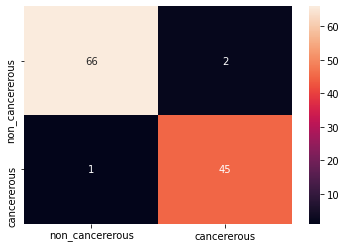

In [ ]:
import seaborn as sns
sns.heatmap(conf_mat, annot=True)
